### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew

sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [394]:
#read all data files
rdata = pd.read_csv('Data.csv')
mdata = pd.read_csv('item.csv')
udata = pd.read_csv('user.csv')

#replace white spaces in the columns names with underscore
rdata.columns =[column.replace(" ", "_") for column in rdata.columns]
mdata.columns =[column.replace(" ", "_") for column in mdata.columns]
udata.columns =[column.replace(" ", "_") for column in udata.columns]

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [147]:
rdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [148]:
rdata.shape

(100000, 4)

In [149]:
rdata.isnull().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [150]:
rdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie_id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [151]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_id      1681 non-null   int64 
 1   movie_title   1681 non-null   object
 2   release_date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [152]:
mdata.shape

(1681, 22)

In [153]:
mdata.isnull().sum()

movie_id        0
movie_title     0
release_date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [154]:
mdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
movie_id,1681.0,841.841761,485.638077,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.000595,0.024390,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.149316,0.356506,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080309,0.271852,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.024985,0.156126,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.072576,0.259516,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300416,0.458576,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.064842,0.246321,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.029744,0.169931,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431291,0.495404,0.0,0.0,0.0,1.0,1.0


In [397]:
udata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [156]:
udata.shape

(943, 5)

In [157]:
udata.isnull().sum()

user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

In [158]:
udata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user_id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


#### 4. Find the number of movies per genre using the item data - 5 marks

In [159]:
#get all the columns names of the data genre 
mdata.columns
idx = ['unknown', 'Action','Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
# number of movies per genre
mdata[idx].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [402]:
#hint: use sum on the axis = 1

#create a new column with the sum of the genre of each movie
mdata['totalGeneres'] = mdata[idx].sum(axis = 1)
#show the movie titles that have totalGeneres > 1 
mdata[['movie_id','movie_title','totalGeneres']].query('totalGeneres > 1').sort_values('totalGeneres', ascending=False)

,movie_id,movie_title,totalGeneres
171,172,"Empire Strikes Back, The",6
558,560,"Kid in King Arthur's Court, A",6
424,426,"Transformers: The Movie, The",6
753,755,Jumanji,5
16,17,From Dusk Till Dawn,5
...,...,...,...
703,705,Singin' in the Rain,2
707,709,Strictly Ballroom,2
710,712,Tin Men,2
712,714,Carrington,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [161]:
#get the list of indexes of the rows that have genre as unknown
indx = mdata.query('unknown == 1').index
#drop the list of rows 
mdata = mdata.drop(index = indx, axis = 1)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.rating

In [ ]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

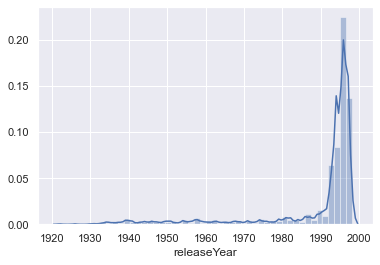

In [409]:
#add a new column with the release year obtained from the release date 
mdata['releaseYear'] = mdata['release_date'].str.split('-').str[2]
#plot releaseYear data
sns.distplot(mdata['releaseYear']);

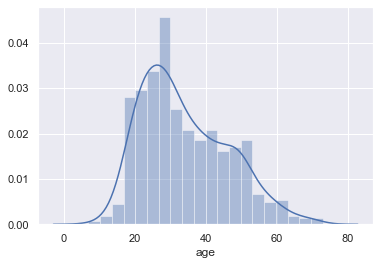

In [21]:
#plot user's age data
sns.distplot(udata['age'], bins = 20);

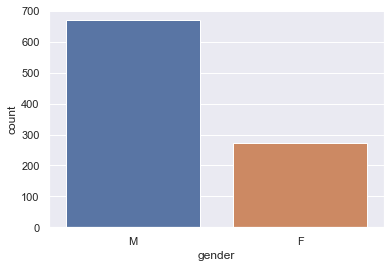

In [22]:
#plot count user's gender data
sns.countplot(udata['gender'], data=udata);

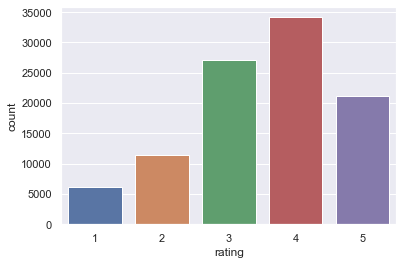

In [405]:
#plot count ratings data 
sns.countplot(rdata['rating'], data=rdata);

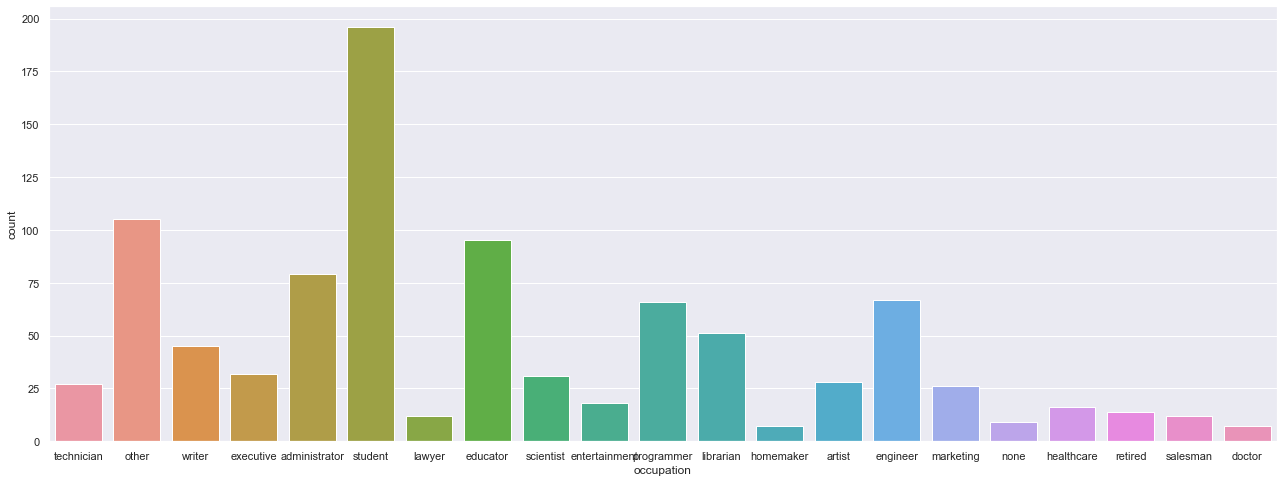

In [24]:
#make the space big enough to show the plot completly 
plt.figure(figsize=(udata['occupation'].nunique()+1,8))
#plot user's occupations
sns.countplot(udata['occupation'], data=udata);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

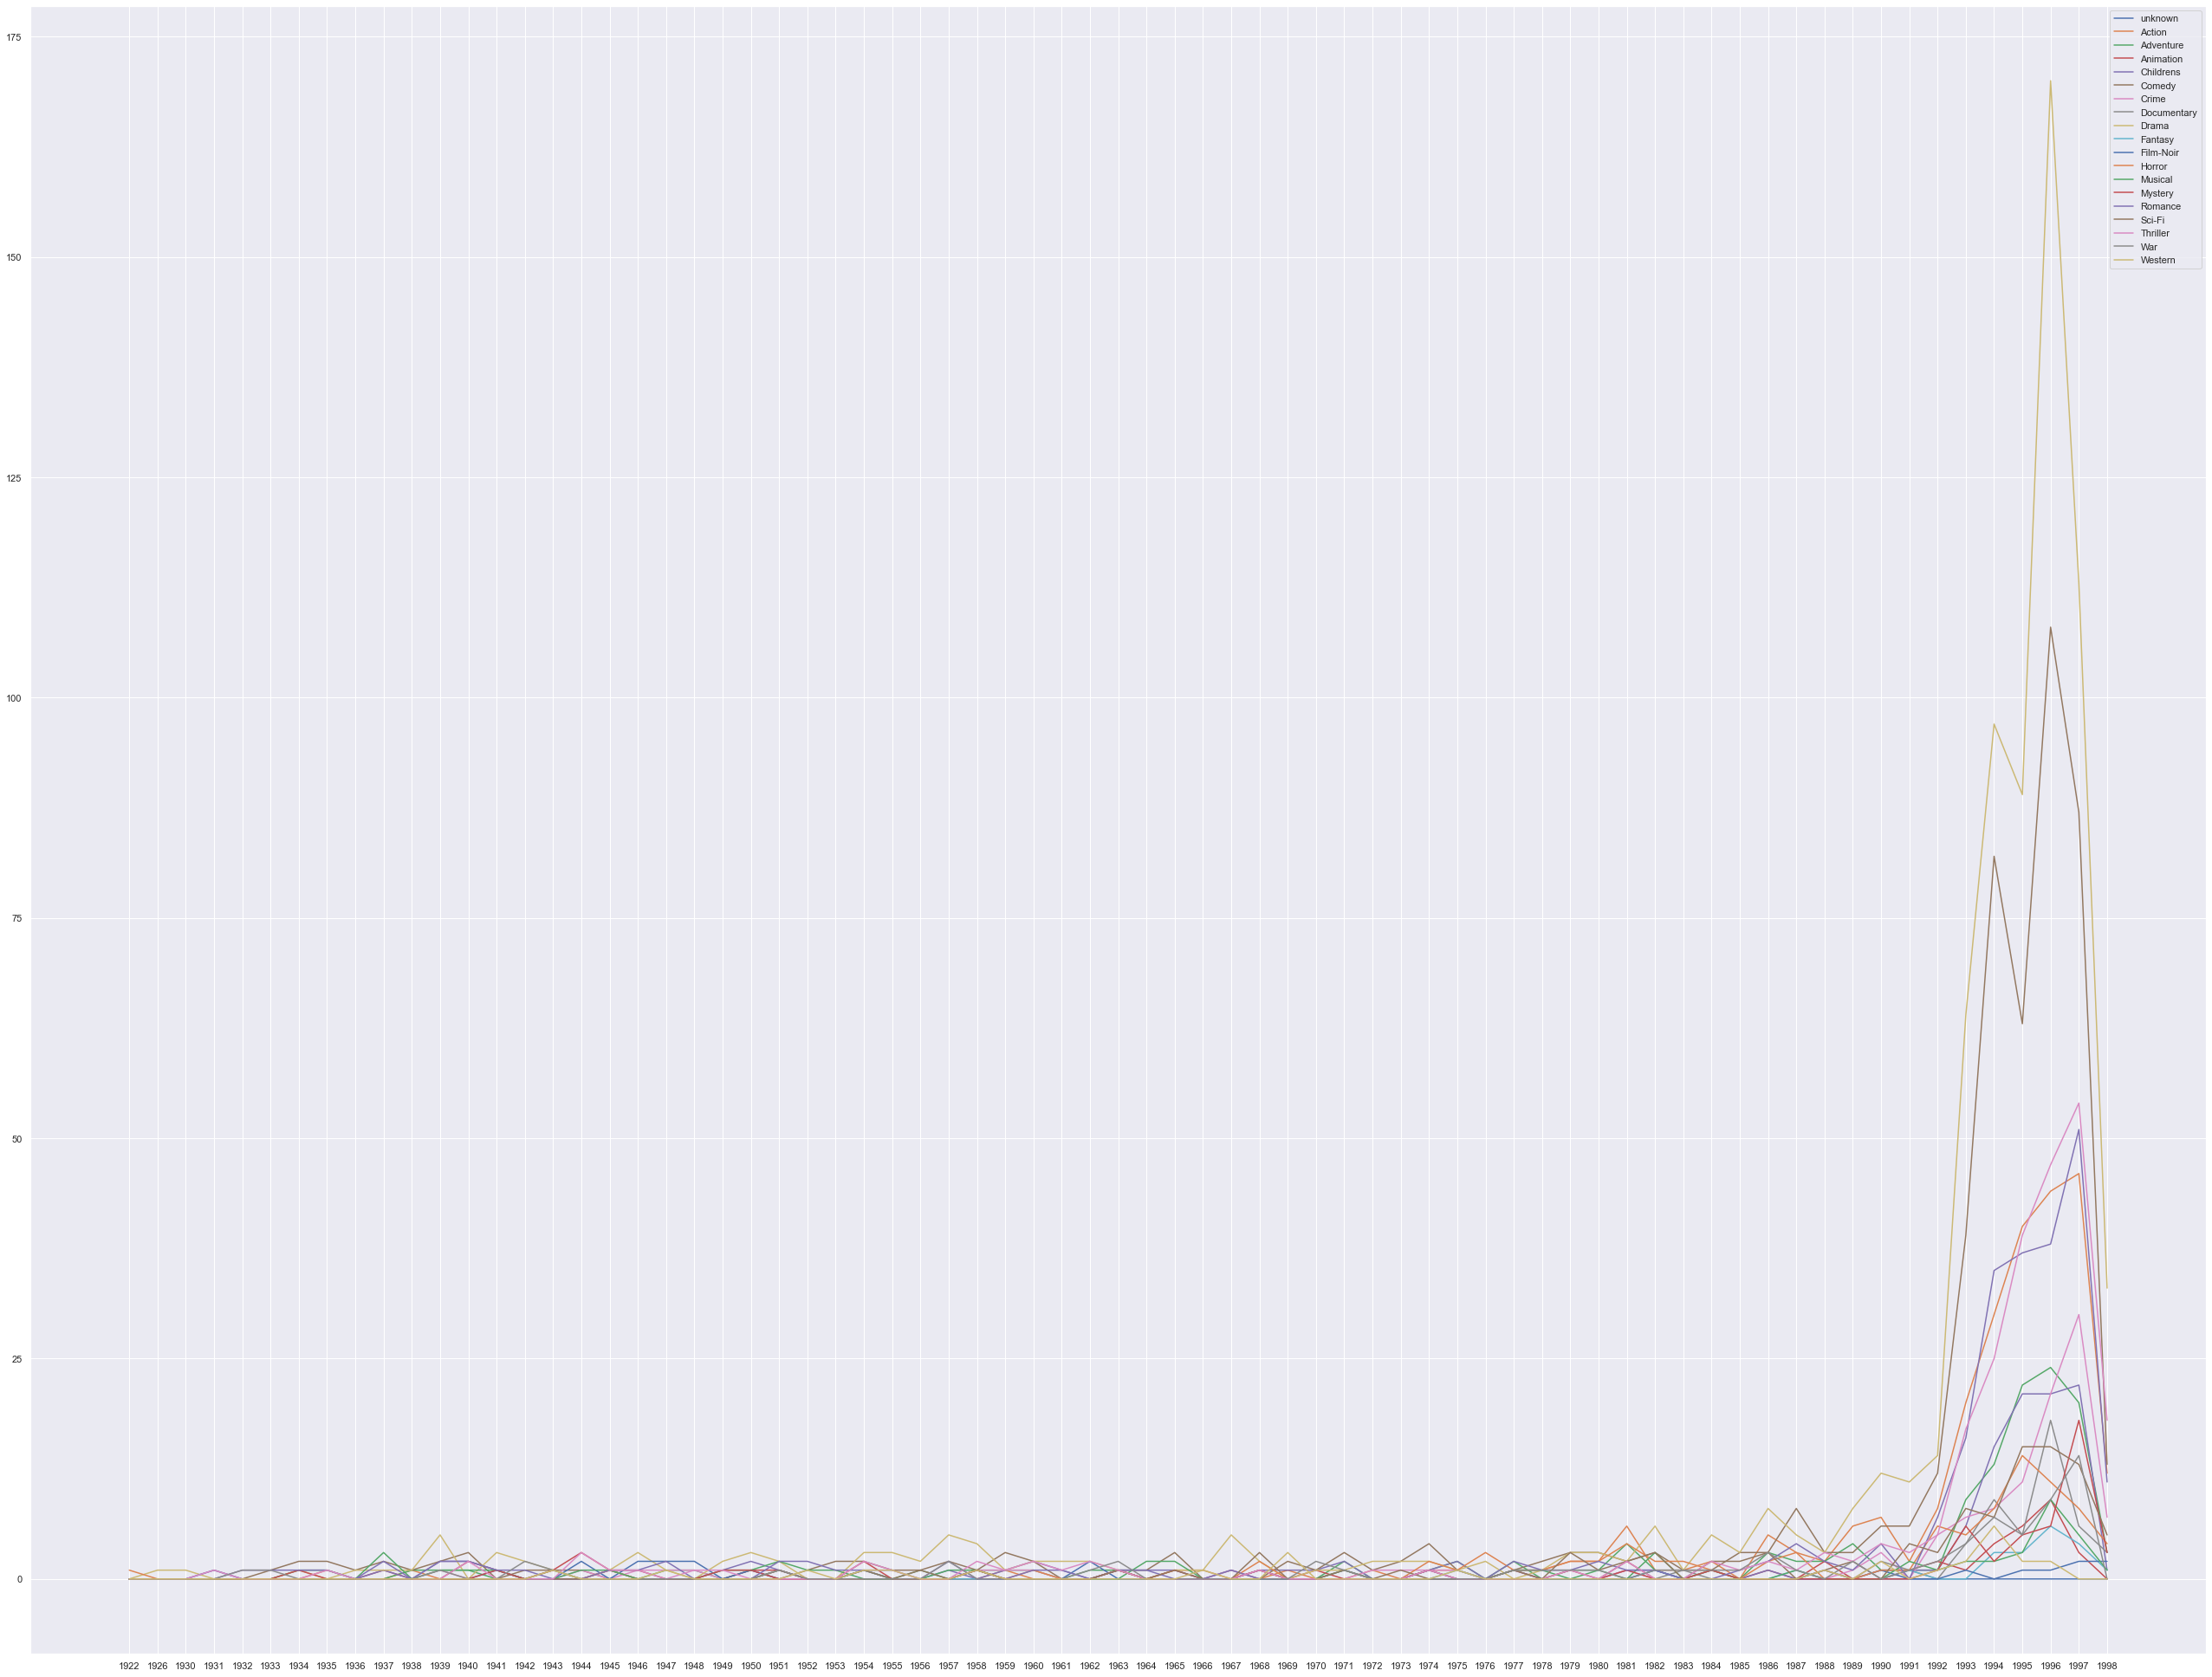

In [415]:
#extract interesting data for this question

mdt2 = mdata[['releaseYear','unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama','Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].copy()
#sumarize the group this subset of data by release year
mdt2 = mdt2.groupby('releaseYear').sum()

#plot the sum of movies genres by year
plt.figure(figsize=(45,35))
           
for genre in idx:
    plt.plot( mdt2[genre], label=genre)

plt.legend()
plt.show()



### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [416]:
#create a new group object grouped by movie id and calculate de mean of the rating 
ratingmovies = rdata.groupby('movie_id')[['rating']].mean()
#merge data of this new group object with movie title from movie data frame
ratingmovies = ratingmovies.merge(mdata[['movie_id','movie_title']], left_on='movie_id', right_on='movie_id')
#get the top 25 values sorted by rating
ratingmovies[['movie_id','movie_title','rating']].sort_values('rating', ascending=False).head(25)

,movie_id,movie_title,rating
812,814,"Great Day in Harlem, A",5.000000
1597,1599,Someone Else's America,5.000000
1199,1201,Marlene Dietrich: Shadow and Light (,5.000000
1120,1122,They Made Me a Criminal,5.000000
1651,1653,Entertaining Angels: The Dorothy Day Story,5.000000
1291,1293,Star Kid,5.000000
1498,1500,Santa with Muscles,5.000000
1187,1189,Prefontaine,5.000000
1534,1536,Aiqing wansui,5.000000
1465,1467,"Saint of Fort Washington, The",5.000000


In [87]:
#create a new group object grouped by movie id generating 2 columns with mean and the count of rating
r1 = rdata[['movie_id','rating']].groupby('movie_id')['rating'].agg(['mean', 'count'])
#merge data of this new group object with movie title from movie data frame
r1 = r1.merge(mdata[['movie_id','movie_title']], left_on='movie_id', right_on='movie_id')
#get top 25 rows selected from rows with count above 100 ratings, sorted by mean 
r1 = r1.query('count > 100').sort_values('mean', ascending=False).head(25)
#rename the columns to better display
r1.columns = ['movie_id','Avg_Rating','NumRates', 'movieTitle']
#show the data
r1[['movie_id', 'movieTitle','Avg_Rating','NumRates']]

,movie_id,movieTitle,Avg_Rating,NumRates
406,408,"Close Shave, A",4.491071,112
316,318,Schindler's List,4.466443,298
168,169,"Wrong Trousers, The",4.466102,118
481,483,Casablanca,4.456790,243
63,64,"Shawshank Redemption, The",4.445230,283
601,603,Rear Window,4.387560,209
11,12,"Usual Suspects, The",4.385768,267
49,50,Star Wars,4.358491,583
177,178,12 Angry Men,4.344000,125
133,134,Citizen Kane,4.292929,198


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [382]:
#identify the important columns for this questions
idx2 = ['movie_id','unknown', 'Action','Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary','Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery','Romance','Sci-Fi', 'Thriller', 'War', 'Western']
#creat a new data frame with the important data for this question from user data
gm = udata[['user_id','gender']]
#merge data of this new group object with rating´s movie from rating
gm = gm.merge(rdata[['user_id','movie_id']],how='inner', left_on='user_id', right_on='user_id')
#merge data of this new group object with movies data
gm = gm.merge(mdata[idx2], left_on='movie_id', how='inner', right_on='movie_id' )
#sumarize the genres grouped by gender
idx3 = ['gender','unknown', 'Action','Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary','Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery','Romance','Sci-Fi', 'Thriller', 'War', 'Western']
ad = gm[idx3].groupby('gender').sum()

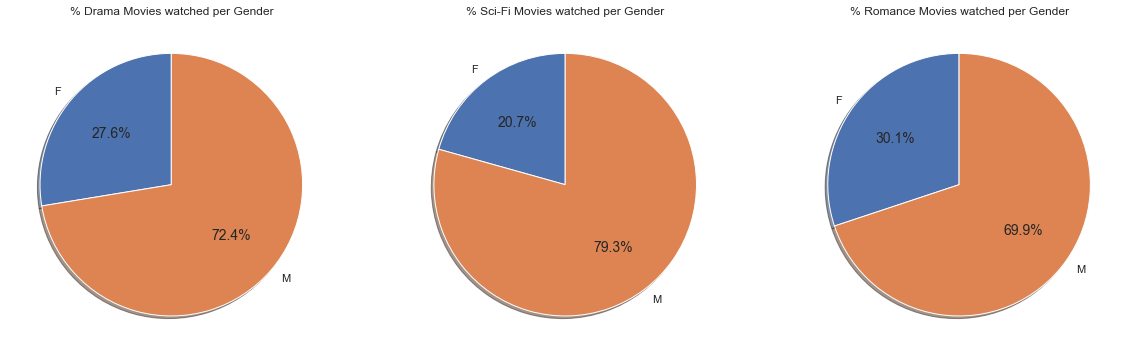

In [417]:
fig, axs = plt.subplots(1, 3, figsize=(20,20))
plt.rcParams['font.size'] = 14.0

#plot the question # 1
axs[0].pie(ad.Drama, labels = ad.index,  autopct='%1.1f%%', shadow=True, startangle=90)
axs[0].set_title('% Drama Movies watched per Gender')

#plot the question # 1
axs[1].pie(ad['Sci-Fi'], labels = ad.index,  autopct='%1.1f%%', shadow=True, startangle=90)
axs[1].set_title('% Sci-Fi Movies watched per Gender')

#plot the question # 1
axs[2].pie(ad.Romance, labels = ad.index,  autopct='%1.1f%%', shadow=True, startangle=90)
axs[2].set_title('% Romance Movies watched per Gender')

plt.show()



In [432]:
udata.query('gender == "M"').count()

user_id       670
age           670
gender        670
occupation    670
zip_code      670
dtype: int64

In [433]:
udata.query('gender == "F"').count()

user_id       273
age           273
gender        273
occupation    273
zip_code      273
dtype: int64

#### Conclusion:



+ Men watch more drama than women
  --As we can see in the first plot, Male users watches 72.4% Drama movies, while Female uses only watches 27.6 Drama movies, so this statement is true.
  
+ Women watch more Sci-Fi than men
  --The second plot shows Male users watches 79.3% of the Sci-Fi movies, while Female uses only watches 20.7 Sci-Fi movies, so this statement is false.

+ Men watch more Romance than women
  --On the thirth plot, it shows Male users watches 69.9% of the Romance movies, while Female uses only watches 30.1 Romance movies, so this statement is false.
  

* In general, Male users watches the most of the genres of the movies, and this is result of the high volume of Male users (670) vs Female users (273).

